In [3]:
! git clone https://github.com/openfheorg/openfhe-python.git \
    && cd openfhe-python \
    && mkdir build \
    && cd build \
    && cmake .. \
    && make -j$(nproc) \
    && make install

Cloning into 'openfhe-python'...
remote: Enumerating objects: 1594, done.
remote: Counting objects: 100% (610/610), done.
remote: Compressing objects: 100% (293/293), done.
remote: Total 1594 (delta 403), reused 337 (delta 317), pack-reused 984
Receiving objects: 100% (1594/1594), 11.47 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (847/847), done.
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.10.12", minimum required is "3.6") 
-- Found PythonLibs: /usr/lib/x86_64-lin

In [5]:
import openfhe




ImportError: /usr/local/lib/python3.10/dist-packages/openfhe/openfhe.so: undefined symbol: _ZN8lbcrypto12DCRTPolyImplIN9bigintdyn9mubintvecINS1_5ubintImEEEEE2atEj

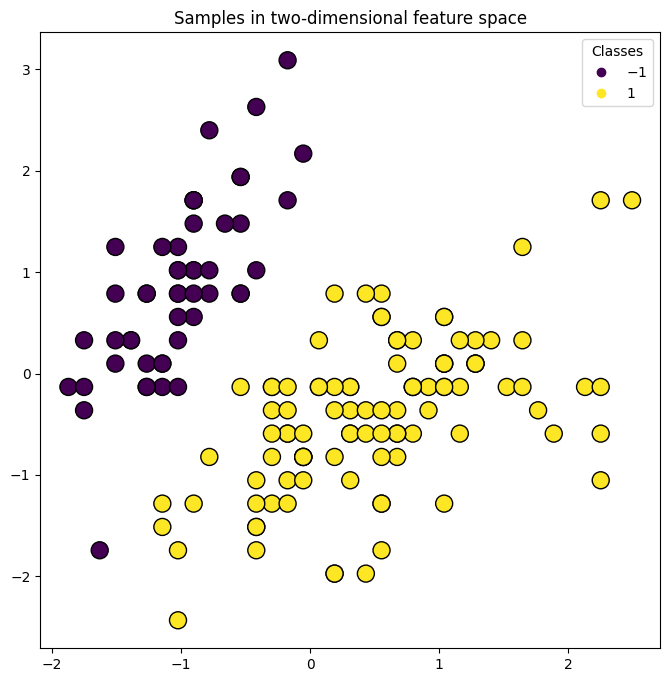

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets,svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

def toLine(a):
    if(a == 0): 
        return -1
    return 1

applyAll = np.vectorize(toLine)

scaler = StandardScaler()

#X = np.array([[0.987, 0.159], [0.354, 0.935]]) #np.array(iris.data[:, :2])
data = [iris.data[1, :2], iris.data[149, :2]]
X = np.array(iris.data[:,:2])
X = scaler.fit_transform(X)

#y = np.array([1, -1])#np.array(applyAll(iris.target))
y = np.array(applyAll(iris.target))

# Plotting settings
fig, ax = plt.subplots(figsize=(8, 8))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

In [3]:
def SVM(K, fi, M, y):
  m1 = np.full((M,1), 1)
  zero = np.full((1,1),0)
  m1t =  np.full((1,M), 1)
  m1t = np.hstack((zero, m1t))

  identity = np.matrix(np.identity(M, dtype=int))

  val = K + ((1/fi)) * identity
  val = np.hstack((m1, val))
  val = np.vstack((m1t, val))

  y_ = y.reshape((M, 1))
  resY = np.vstack((zero, y_))

  #print(val)

  res = np.linalg.solve(val, resY)

  return res

x = X
K = []

def k(x0, x1):
  return np.dot(np.array(x0), np.array(x1))

for i in range(0, len(x)):
  K.append([])
  for j in range(0, len(x)):
    K[i].append(k(x[i], x[j]))


#y = y_raw

Kteste = np.matrix(K)
Yteste = y

r = SVM(Kteste,30,len(x),Yteste)

sums = [0, 0]
counts = [0, 0]

for i in range(1,len(y)):
    if(y[i] == 1):
        sums[0] += r[i,0]
        counts[0] += 1
    if(y[i] == -1):
        sums[1] += r[i,0]
        counts[1] += 1
    

w = [ 2.28565137, -2.57106925]

slope = -w[0]/w[1]
result = []

for i in range(1,len(y)):
    for j in range(1,len(y)):
        if len(result) == 0:
            result = [r[i,0],r[j,0]]
        if abs(slope-(-r[i,0]/r[j,0])) < abs(slope-(-result[0]/result[1])):
            result = [r[i,0],r[j,0]]
            print(result)
            print(-result[0]/result[1])
            print(i, j)
            

w1 = [sums[0]/counts[0] , sums[1]/counts[1]]

b = -4.2579756
b1 = 0


[np.float64(-8.138113574038886), np.float64(-20.775240335385565)]
-0.39172175352299493
1 2
[np.float64(-8.138113574038886), np.float64(9.21788881630984)]
0.8828608953971724
1 16
[np.float64(-20.775240335385565), np.float64(23.501517806066783)]
0.8839956851647495
2 67
[np.float64(-12.970249609177309), np.float64(14.516808172609819)]
0.8934642832609345
9 139
[np.float64(-8.024853167900723), np.float64(9.071255260902879)]
0.8846463843309371
11 125
[np.float64(-4.825477664560191), np.float64(5.418838133015402)]
0.8905004257573153
12 72
[np.float64(-4.825477664560191), np.float64(5.418838133015412)]
0.8905004257573137
12 74
[np.float64(9.21788881630984), np.float64(-10.384290982400248)]
0.8876762825630292
16 28
[np.float64(-11.56400988965282), np.float64(12.99730804694767)]
0.8897234602644161
40 94
[np.float64(14.403547766471512), np.float64(-16.202998261782362)]
0.8889433630592202
56 88
[np.float64(14.40354776647217), np.float64(-16.202998261782362)]
0.8889433630592608
100 88


-1.6561108184853444
-0.0
-0.0


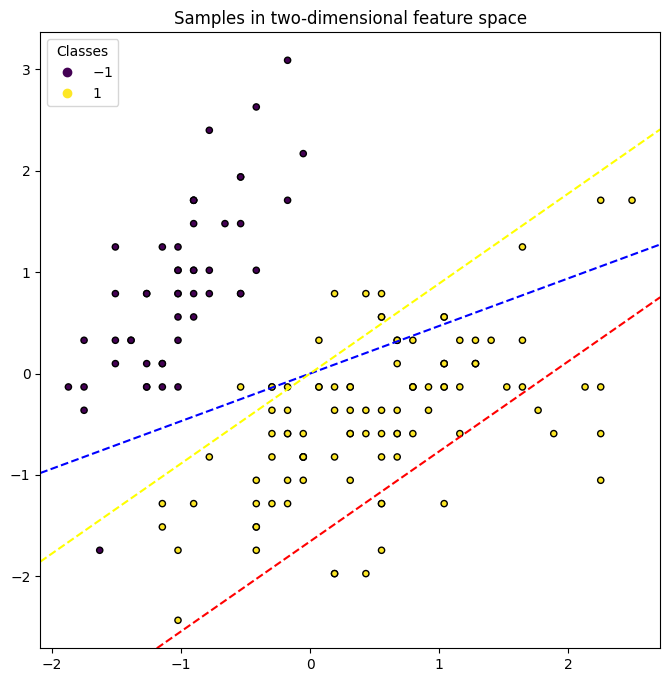

In [123]:
# Plotting settings
fig, ax = plt.subplots(figsize=(8, 8))
slope = -w[0]/w[1]
intercept = -b/w[1]

print(intercept)

ax.axline((0, intercept), slope=slope, color='red', linestyle='--', label='Decision Boundary')

slope1 = -w1[0]/w1[1]
intercept1 = -b1/w1[1]
print(intercept1)
ax.axline((0, intercept1), slope=slope1, color='blue', linestyle='--', label='Decision Boundary with error')

slope2 = -result[0]/result[1]
intercept2 = -b1/result[1]
print(intercept2)
ax.axline((0, intercept2), slope=slope2, color='yellow', linestyle='--', label='Decision Boundary with error')

margem = 2 / (math.sqrt(w[0]*w[0] + w[1]*w[1]))


# #support vectors
#ax.axline([b + margem, margem], [b + margem - w[1], w[0] + margem])
#ax.axline([b - margem, -margem], [b - margem - w[1] , w[0] - margem])

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=20, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()